### Path Finder: What are the potential paths between two nodes?
### This pipeline can be used to get a ranked path between A and B given a set of paths.

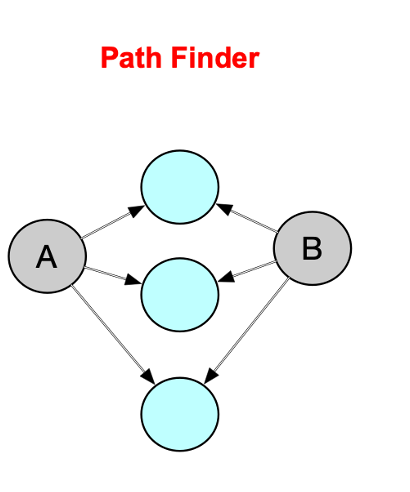


In [1]:
from TCT import TCT

from TCT import name_resolver
from TCT import translator_metakg
from TCT import translator_kpinfo
from TCT import translator_query


import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import requests
import json
import pandas as pd
import  seaborn as sns
import networkx as nx
import numpy as np
import ipycytoscape
import yaml


In [2]:
APInames, metaKG, Translator_KP_info= translator_metakg.load_translator_resources()

All_predicates = list(set(metaKG['Predicate']))
All_categories = list((set(list(set(metaKG['Subject']))+list(set(metaKG['Object'])))))
API_withMetaKG = list(set(metaKG['API']))

    # generate a dictionary of API and its predicates
API_predicates = {}
for api in API_withMetaKG:
    API_predicates[api] = list(set(metaKG[metaKG['API'] == api]['Predicate']))

In [4]:
# select a list of APIs to use and a list of predicates to use
selected_APIlist = []

if len(selected_APIlist) == 0:
    select_APIs = APInames
else:
    select_APIs = {k: APInames[k] for k in selected_APIlist if k in APInames}

selected_metaKG = metaKG[metaKG['API'].isin(select_APIs.keys())]
#print(select_APIs)
print(selected_metaKG.shape)


(22147, 5)


In [20]:
name_resolver.lookup('miR-155')

TranslatorNode(curie='NCBIGene:114483536', label='MIR155', types=['biolink:Gene', 'biolink:GeneOrGeneProduct', 'biolink:GenomicEntity', 'biolink:ChemicalEntityOrGeneOrGeneProduct', 'biolink:PhysicalEssence', 'biolink:OntologyClass', 'biolink:BiologicalEntity', 'biolink:ThingWithTaxon', 'biolink:NamedThing', 'biolink:Entity', 'biolink:PhysicalEssenceOrOccurrent', 'biolink:MacromolecularMachineMixin'], synonyms=None, curie_synonyms=None)

NCBIGene:3458
MONDO:0100096
'imProving Agent for TRAPI 1.5' generated an exception: argument of type 'NoneType' is not iterable
'Automat-ehr-may-treat-kp(Trapi v1.5.0)' generated an exception: argument of type 'NoneType' is not iterable
'Multiomics KP - TRAPI 1.5.0' generated an exception: argument of type 'NoneType' is not iterable
'SPOKE KP for TRAPI 1.5' generated an exception: argument of type 'NoneType' is not iterable
'Microbiome KP - TRAPI 1.5.0' generated an exception: argument of type 'NoneType' is not iterable
'MolePro' generated an exception: argument of type 'NoneType' is not iterable
'Automat-pharos(Trapi v1.5.0)' generated an exception: argument of type 'NoneType' is not iterable
'Automat-icees-kg(Trapi v1.5.0)' generated an exception: argument of type 'NoneType' is not iterable
'Automat-monarchinitiative(Trapi v1.5.0)' generated an exception: argument of type 'NoneType' is not iterable
'Connections Hypothesis Provider API' generated an exception: 'NoneType' object has no

/opt/miniconda3/envs/my-rdkit-env/lib/python3.13/site-packages/TCT/TCT.py:1508: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="center", fontsize=fontsize)


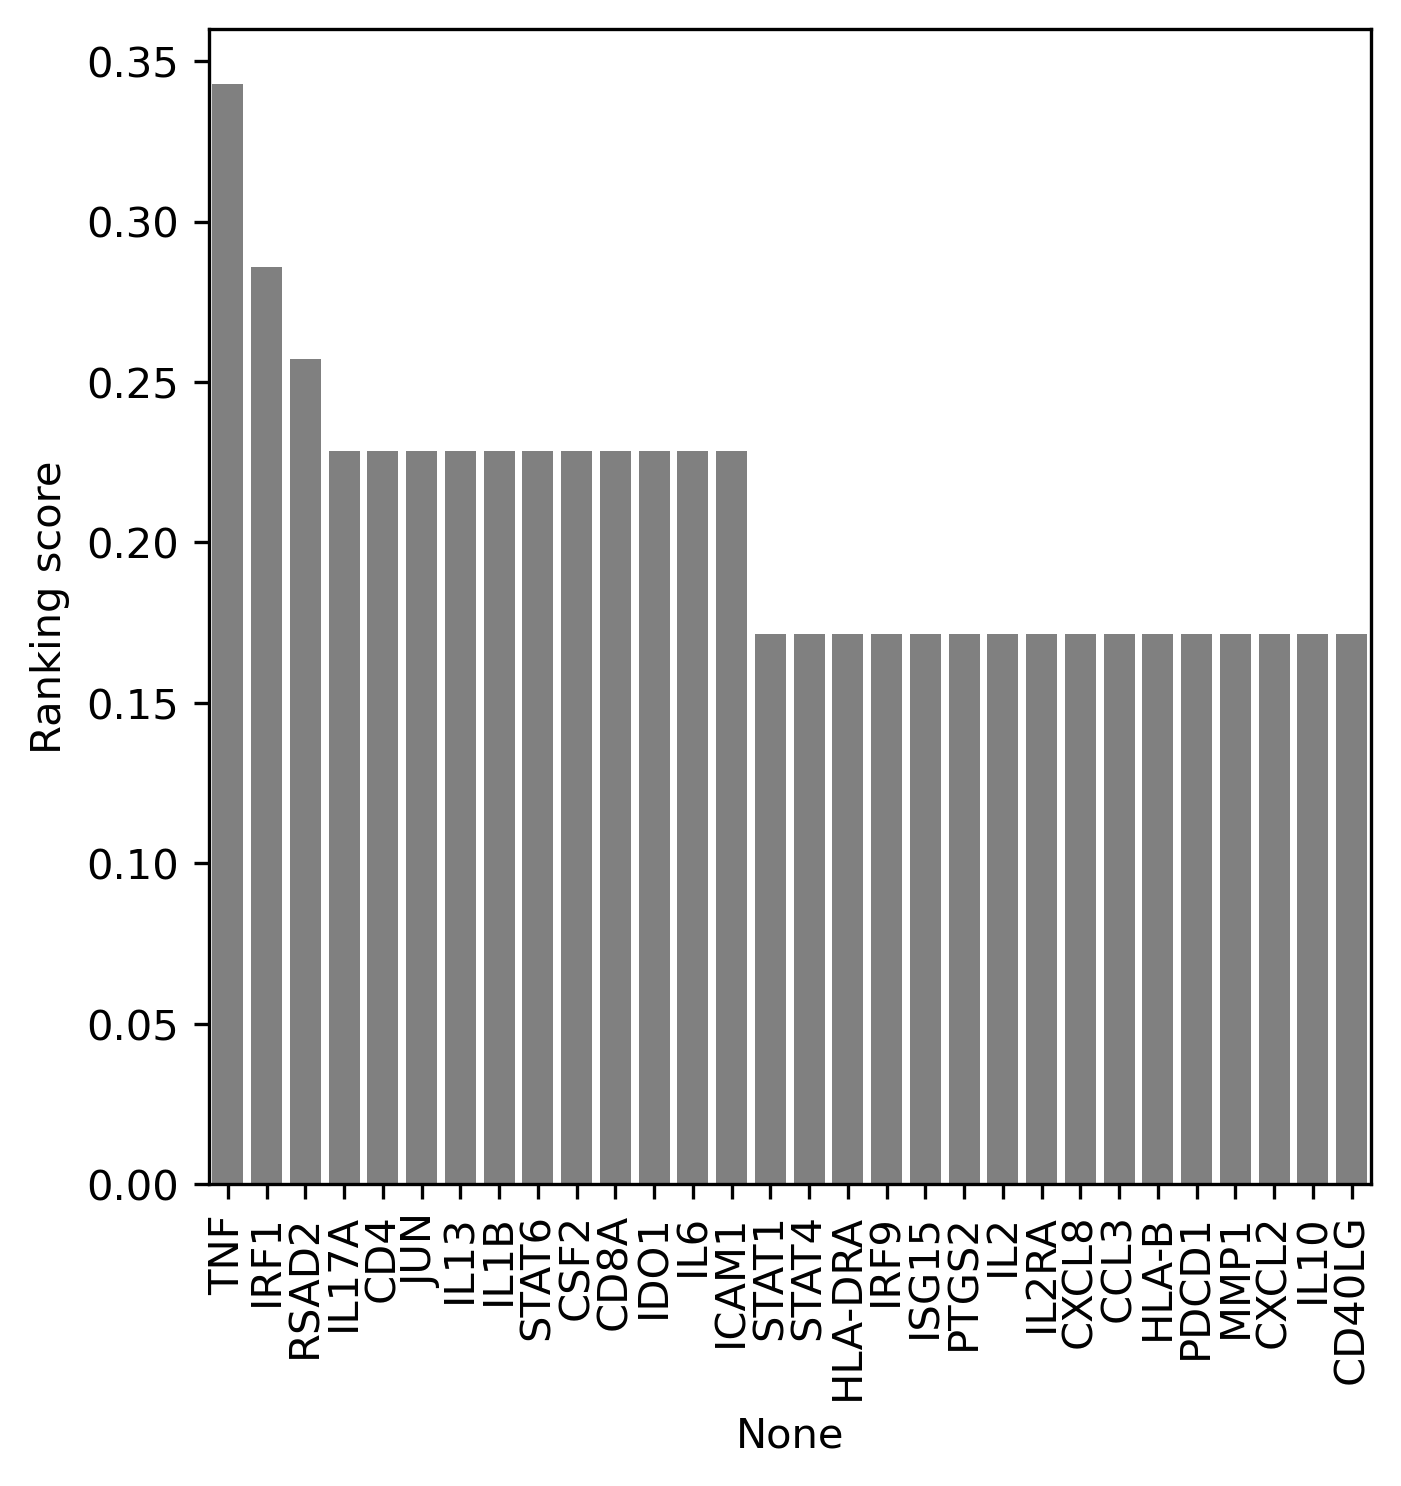

In [9]:
paths, input_node1_id, input_node2_id, result1, result2, result_parsed1, result_parsed2, result_ranked_by_primary_infores1, result_ranked_by_primary_infores2 = TCT.Path_finder(input_node1='IFNG', 
                                                                                                                                                                                input_node2= 'COVID-19', 
                                                                                                                                                                                intermediate_categories=['biolink:Protein', 'biolink:Gene' ], 
                                                                                                                                                                                APInames=select_APIs, 
                                                                                                                                                                                metaKG=selected_metaKG, 
                                                                                                                                                                                API_predicates=API_predicates)

In [ ]:
intermediate_node = name_resolver.lookup('IDO2').curie



In [75]:
matches2 = []
for k in result2.keys():
    if input_node2_id == result2[k]['subject'] and intermediate_node == result2[k]['object']:
        matches2.append(result2[k])
    elif input_node2_id == result2[k]['object'] and intermediate_node == result2[k]['subject']:
        matches2.append(result2[k])

for k in matches2:
    print(k['sources'])

[{'resource_id': 'infores:diseases', 'resource_role': 'primary_knowledge_source'}, {'resource_id': 'infores:rtx-kg2', 'resource_role': 'aggregator_knowledge_source', 'upstream_resource_ids': ['infores:diseases']}]


In [46]:
matches = []
for k in result1.keys():
    if input_node1_id == result1[k]['subject'] and intermediate_node == result1[k]['object']:
        matches.append(result1[k])
    elif input_node1_id == result1[k]['object'] and intermediate_node == result1[k]['subject']:
        matches.append(result1[k])

for k in matches:
    print(k['sources'])

[{'resource_id': 'infores:string', 'resource_role': 'primary_knowledge_source'}, {'resource_id': 'infores:monarchinitiative', 'resource_role': 'aggregator_knowledge_source', 'upstream_resource_ids': ['infores:string']}, {'resource_id': 'infores:service-provider-trapi', 'resource_role': 'aggregator_knowledge_source', 'upstream_resource_ids': ['infores:monarchinitiative']}]
[{'resource_id': 'infores:string', 'resource_role': 'primary_knowledge_source'}, {'resource_id': 'infores:monarchinitiative', 'resource_role': 'aggregator_knowledge_source', 'upstream_resource_ids': ['infores:string']}, {'resource_id': 'infores:biothings-explorer', 'resource_role': 'aggregator_knowledge_source', 'upstream_resource_ids': ['infores:monarchinitiative']}]


In [ ]:


# Create a DataFrame from the matches
df = pd.DataFrame(matches)

# Display the DataFrame
df

predicate          subject         object  \
0  biolink:interacts_with  NCBIGene:169355  NCBIGene:3458   
1  biolink:interacts_with  NCBIGene:169355  NCBIGene:3458   

                                          attributes  \
0  [{'attribute_type_id': 'biolink:knowledge_leve...   
1  [{'attribute_type_id': 'biolink:knowledge_leve...   

                                             sources  
0  [{'resource_id': 'infores:string', 'resource_r...  
1  [{'resource_id': 'infores:string', 'resource_r...

In [17]:
import lmstudio as lms
model = lms.llm("openai/gpt-oss-120b")
input_text = str(result1) + 'and '+str(result2)
question = "summarize the path that go over NCBIGene:23411 between NCBIGene:2739 and CHEBI:45713" 

In [22]:
result = model.respond("find the path between NPC1 and WNT7B" )

In [23]:
result

PredictionResult(content='<|channel|>analysis<|message|>We need to answer likely about a network of interactions? Provide path maybe gene interaction. Use known pathways: NPC1 interacts with cholesterol transport; WNT7B is ligand in Wnt signaling. Path could be via LDLR, β-catenin etc. Provide plausible molecular path.<|end|><|start|>assistant<|channel|>final<|message|>**Short answer:**  \nA biologically plausible route that connects the lysosomal‑cholesterol transporter **NPC1** to the secreted morphogen **WNT7B** runs through the intracellular cholesterol/oxysterol sensing machinery (SREBP‑2, LXRα/β) → transcriptional regulators of Wnt ligand expression (e.g.,\u202fTCF/LEF, β‑catenin) → a feedback loop that modulates WNT7B secretion.  \n\nBelow is a step‑by‑step “path” that stitches together the best‑supported molecular links from the literature and public interaction databases (STRING, BioGRID, Reactome, Gene Ontology).  Each edge is annotated with the type of evidence (physical bin

In [10]:
paths

score     output_node  \
SIRT1      0.150  NCBIGene:23411   
HSPB1      0.150   NCBIGene:3315   
FLT1       0.150   NCBIGene:2321   
PTGS2      0.125   NCBIGene:5743   
MAOA       0.100   NCBIGene:4128   
...          ...             ...   
PLAUR      0.025   NCBIGene:5329   
RETN       0.025  NCBIGene:56729   
GABARAPL1  0.025  NCBIGene:23710   
CES1       0.025   NCBIGene:1066   
GABPA      0.025   NCBIGene:2551   

                                                  predictes1  \
SIRT1                     biolink:regulates; biolink:affects   
HSPB1      biolink:physically_interacts_with; biolink:cor...   
FLT1       biolink:interacts_with; biolink:regulates; bio...   
PTGS2                                   biolink:regulated_by   
MAOA                                  biolink:interacts_with   
...                                                      ...   
PLAUR                                biolink:correlated_with   
RETN                                 biolink:correlated_with   
GABARAPL1                               biolink:regulated_by   
CES1                      biolink:regulates; biolink:affects   
GABPA                     biolink:regulates; biolink:affects   

                                                  predictes2 output_node_name  
SIRT1      biolink:affects; biolink:interacts_with; bioli...            SIRT1  
HSPB1      biolink:affected_by; biolink:occurs_together_i...            HSPB1  
FLT1       biolink:affected_by; biolink:occurs_together_i...             FLT1  
PTGS2      biolink:affected_by; biolink:affected_by; biol...            PTGS2  
MAOA       biolink:affected_by; biolink:affected_by; biol...             MAOA  
...                                                      ...              ...  
PLAUR      biolink:occurs_together_in_literature_with; bi...            PLAUR  
RETN       biolink:occurs_together_in_literature_with; bi...             RETN  
GABARAPL1           biolink:affected_by; biolink:affected_by        GABARAPL1  
CES1                biolink:affected_by; biolink:affected_by             CES1  
GABPA      biolink:interacts_with; biolink:occurs_togethe...            GABPA  

[199 rows x 5 columns]

In [36]:
paths

score     output_node  \
SIRT1     0.150  NCBIGene:23411   
FLT1      0.150   NCBIGene:2321   
HSPB1     0.150   NCBIGene:3315   
PTGS2     0.125   NCBIGene:5743   
APP       0.100    NCBIGene:351   
...         ...             ...   
CD244     0.025  NCBIGene:51744   
BNIP3     0.025    NCBIGene:664   
SERPINE1  0.025   NCBIGene:5054   
PDGFA     0.025   NCBIGene:5154   
THBD      0.025   NCBIGene:7056   

                                                 predictes1  \
SIRT1                    biolink:affects; biolink:regulates   
FLT1      biolink:directly_physically_interacts_with; bi...   
HSPB1     biolink:correlated_with; biolink:physically_in...   
PTGS2                                  biolink:regulated_by   
APP                      biolink:positively_correlated_with   
...                                                     ...   
CD244                               biolink:correlated_with   
BNIP3                                  biolink:regulated_by   
SERPINE1      biolink:regulated_by; biolink:correlated_with   
PDGFA                               biolink:correlated_with   
THBD                                biolink:correlated_with   

                                                 predictes2 output_node_name  
SIRT1     biolink:affects; biolink:interacts_with; bioli...            SIRT1  
FLT1      biolink:occurs_together_in_literature_with; bi...             FLT1  
HSPB1     biolink:occurs_together_in_literature_with; bi...            HSPB1  
PTGS2     biolink:affected_by; biolink:occurs_together_i...            PTGS2  
APP       biolink:interacts_with; biolink:occurs_togethe...              APP  
...                                                     ...              ...  
CD244              biolink:affected_by; biolink:affected_by            CD244  
BNIP3     biolink:affected_by; biolink:affected_by; biol...            BNIP3  
SERPINE1  biolink:occurs_together_in_literature_with; bi...         SERPINE1  
PDGFA     biolink:occurs_together_in_literature_with; bi...            PDGFA  
THBD      biolink:occurs_together_in_literature_with; bi...             THBD  

[199 rows x 5 columns]

In [37]:
'NFE2L2' in paths['output_node_name']

True

In [11]:
forplot = TCT.visulize_path(input_node1_id, name_resolver.lookup('HOXB7').curie, input_node2_id, result1, result2) 

CytoscapeWidget(cytoscape_layout={'name': 'cola', 'title': 'Path', 'nodeSpacing': 80, 'edgeLengthVal': 50}, cy…

CHEBI:83766
NCBIGene:672
'Text Mined Cooccurrence API' generated an exception: argument of type 'NoneType' is not iterable
'SPOKE KP for TRAPI 1.5' generated an exception: argument of type 'NoneType' is not iterable
'imProving Agent for TRAPI 1.5' generated an exception: argument of type 'NoneType' is not iterable
'MolePro' generated an exception: argument of type 'NoneType' is not iterable
CATRAX BigGIM DrugResponse Performance Phase KP - TRAPI 1.5.0: Success!
CATRAX Pharmacogenomics KP - TRAPI 1.5.0: Success!
'Automat-ehr-clinical-connections-kp(Trapi v1.5.0)' generated an exception: argument of type 'NoneType' is not iterable
'Microbiome KP - TRAPI 1.5.0' generated an exception: argument of type 'NoneType' is not iterable
'Multiomics KP - TRAPI 1.5.0' generated an exception: argument of type 'NoneType' is not iterable
'Automat-ehr-may-treat-kp(Trapi v1.5.0)' generated an exception: argument of type 'NoneType' is not iterable
'Automat-ubergraph(Trapi v1.5.0)' generated an exception: 

/Users/guangrong/.pyenv/versions/3.12.1/lib/python3.12/site-packages/TCT/TCT.py:1517: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="center", fontsize=fontsize)


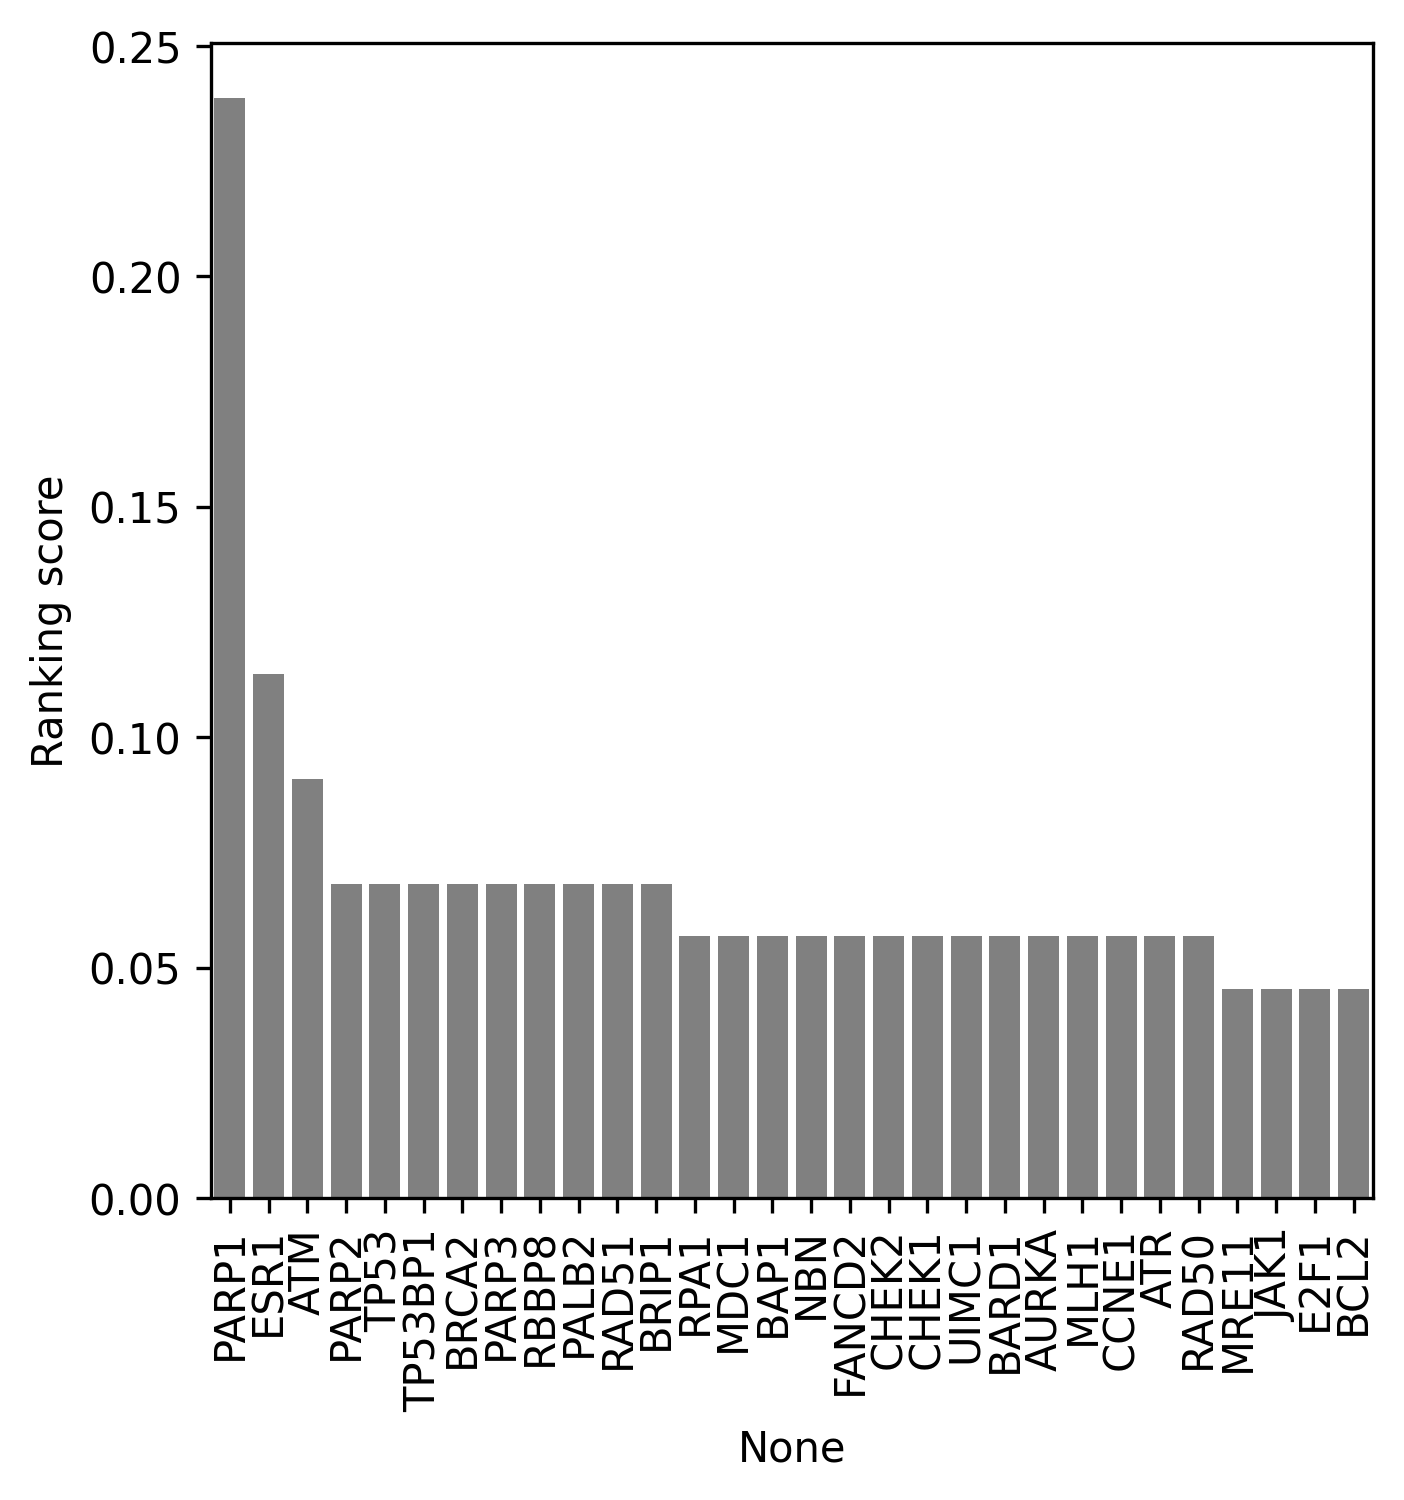

In [13]:
paths, input_node1_id, input_node2_id, result1, result2, result_parsed1, result_parsed2, result_ranked_by_primary_infores1, result_ranked_by_primary_infores2 = TCT.Path_finder('Olaparib', 
                                                                                                                                                                                'BRCA1', 
                                                                                                                                                                                ['biolink:Gene', 'biolink:Protein'], 
                                                                                                                                                                                APInames=select_APIs, 
                                                                                                                                                                                metaKG=selected_metaKG, 
                                                                                                                                                                                API_predicates=API_predicates)

In [48]:
forplot = TCT.visulize_path(input_node1_id, name_resolver.lookup('IDO2').curie, input_node2_id, result1, result2) 

CytoscapeWidget(cytoscape_layout={'name': 'cola', 'title': 'Path', 'nodeSpacing': 80, 'edgeLengthVal': 50}, cy…

# link to the UI
https://ui.ci.transltr.io/
